In [1]:
import numpy as np
from scipy.stats import multinomial, norm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from genpen.utils import Paper
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
from genpen import genpen as gp
import fn
from pathlib import Path
import itertools

In [2]:
# make page
paper_size = '11x14 inches'
border:float=30
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)

In [3]:
def evaluate(A, x, n, dt=1):
    xs = []
    for ii in range(n):
        xs.append(x.copy())
        x += (A @ x) * dt
    return np.stack(xs)

In [4]:
x = np.array([1., 0.,])
A = np.array(
    [
        [0.01,  -0.09, ],
        [0.08, -0.02,],
     ]
)

In [5]:
def characterize_lds(A):
    trace = np.trace(A)
    determinant = np.linalg.det(A)
    delta = np.sqrt(trace**2 - 4 * determinant)
    return {
        'trace': trace,
        'determinant': determinant,
        'delta': delta,
    }

In [6]:
workspace = box(-110, -140, 110, 140)

In [7]:
p_workspace = gp.Poly(workspace)

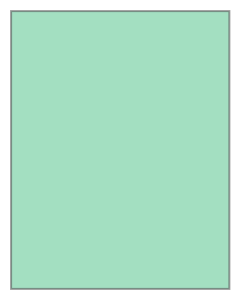

In [8]:
workspace

In [115]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=20, ystep=6, flatmesh=True)
init_pts = np.stack([xs, ys], axis=1)

In [119]:
lss = []
for pt in init_pts:
    new_pts = evaluate(A, pt, 5, dt=1)
    ls = LineString(new_pts).intersection(workspace)
    if ls.length > 0:
        lss.append(ls)
    

In [120]:
mls = gp.merge_LineStrings(lss)

In [121]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')

sk.geometry(mls)

# sk.stroke(len(layers)+2)
# sk.geometry(blss)
    
sk.display(color_mode='layer')

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-11-14T12:40:53.436798

# varying A

In [59]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=2, ystep=5, flatmesh=True)
init_pts = np.stack([xs, ys], axis=1)

In [60]:
lss = []
for pt in init_pts:
    A = np.array(
        [
            [0.01,  np.interp(pt[1], [p_workspace.top, p_workspace.bottom], [0.09, -0.09]),],
            [0.08, np.interp(pt[0], [p_workspace.left, p_workspace.right], [0.5, -0.9]),],
        ]
    )
    new_pts = evaluate(A, pt.copy(), 3, dt=1)
    ls = LineString(new_pts).intersection(workspace)
    if ls.length > 0:
        lss.append(ls)
    

In [61]:
mls = gp.merge_LineStrings(lss)

In [72]:
circle = Point(0, -80).buffer(50)

In [73]:
subtracted = mls.difference(circle)

In [75]:
final = gp.make_like(subtracted, drawbox)

In [77]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')

sk.geometry(final)

# sk.stroke(len(layers)+2)
# sk.geometry(blss)
    
sk.display(color_mode='layer')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vsketch/vsketch.py:1021: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for ls in shape:


<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-11-14T13:13:10.491591 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

fn.fn.Fn

In [82]:
sk.vpype('splitall linemerge -t 0.1 linesimplify linemerge -t 0.3 linesimplify linemerge -t 0.5 linesimplify linesort')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:150: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in lines:
/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:151: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.append(line)


In [84]:
plot_id = fn.new_plot_id()
savedir='/home/naka/art/plotter_svgs'

saved 20221114-131544_961203-43f19-1799b3 to s3://algorithmic-ink/current_plot_id


In [86]:
savepath = Path(savedir).joinpath(f'{plot_id}.svg').as_posix()
sk.save(savepath)

# multiple systems

In [ ]:
characterize_lds(A)

In [100]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=2, ystep=2, flatmesh=True)
init_pts = np.stack([xs, ys], axis=1)

In [117]:
results = []
xs = np.linspace(-0.2, 0.2, 100)
ys = np.linspace(-0.2, 0.2, 100)
for x,y in itertools.product(xs, ys):
    A = np.array(
        [
            [0.02,  x],
            [0.01, y],
        ]
    )
    result = characterize_lds(A)
    result['x'] = x
    result['y'] = y
    results.append(result)
    
df = pd.DataFrame(results)

/tmp/ipykernel_66860/3650390641.py:4: RuntimeWarning: invalid value encountered in sqrt
  delta = np.sqrt(trace**2 - 4 * determinant)


In [118]:
df['stable'] = df['trace'] < 0

<AxesSubplot:xlabel='x', ylabel='y'>

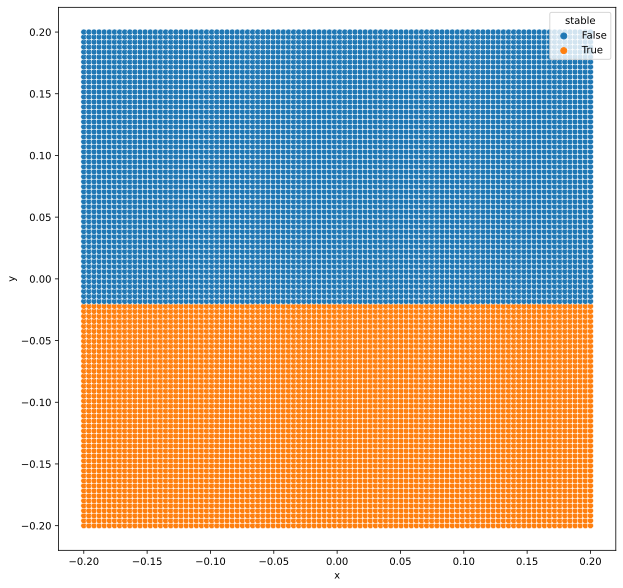

In [119]:
f,ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(data=df, x='x', y='y', hue='stable', ax=ax)

In [180]:
a = -0.01
b = 0.01
spiral = np.array(
        [
            [a, -b],
            [b, a],
        ]
    )

saddle = np.array([
  [-0.01, 0],
  [0, 0.01]
])

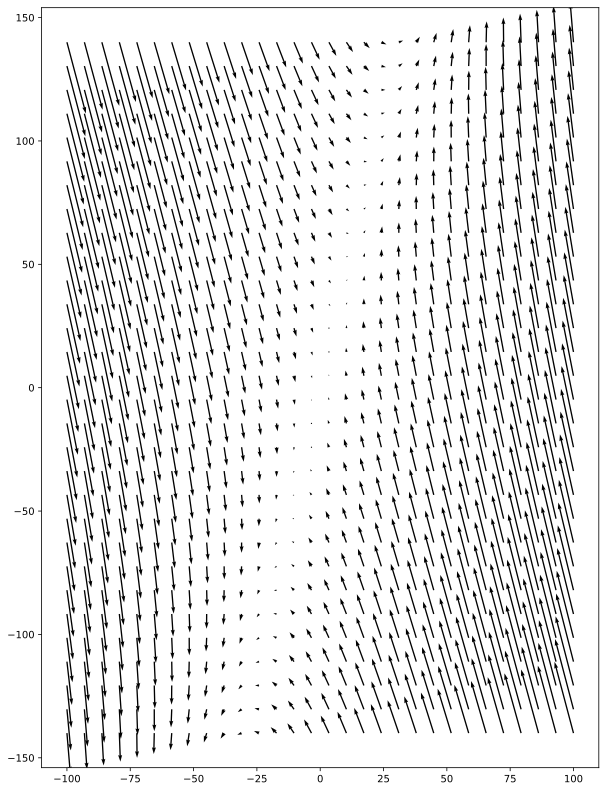

In [205]:
A = np.array(
        [
            [-0.02,  0.1],
            [0.01, -0.02],
        ]
    )

xs = np.linspace(-100, 100, 30)
ys = np.linspace(-140, 140, 30)

xys = np.stack([np.array((x,y)) for x,y in itertools.product(xs, ys)]) 
dxdys = xys @ A

f,ax = plt.subplots(1,1, figsize=(10,14))
ax.quiver(xys[:,0], xys[:,1], dxdys[:,0], dxdys[:,1], scale=100)

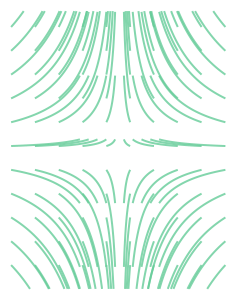

In [185]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=24, ystep=24, flatmesh=True)
init_pts = np.stack([xs, ys], axis=1)
lss = []
for pt in init_pts:
    new_pts = evaluate(saddle, pt, 100, dt=1)
    ls = LineString(new_pts).intersection(workspace)
    if ls.length > 0:
        lss.append(ls)
    
mls = gp.merge_LineStrings(lss)
mls

In [197]:
np.linspace(p_workspace.left, p_workspace.right, 4)

array([-110.        ,  -36.66666667,   36.66666667,  110.        ])

In [287]:
boxes = [
    box(-110, -140, -36.66, 140),
    box(-36.66, -140, 36.66, 140),
    box(36.66, -140, 110, 140),
]
boxes = MultiPolygon(boxes).buffer(-12)

In [346]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=6, ystep=6, flatmesh=True)
bg_pts = MultiPoint(np.stack([xs, ys], axis=1))

In [289]:
bg_pts = bg_pts.difference(boxes)

In [332]:
a = -0.04
b = 0.04
spiral = np.array(
        [
            [a, -b],
            [b, a],
        ]
    )

saddle = np.array([
  [a, 0],
  [0, -a]
])

unstable = np.array(
        [
            [a,  b],
            [b, a],
        ]
    )

spiral2 = np.array([
    [a*2, -b],
    [b, a*2]
])

spiral3 = np.array([
    [a, -b*2],
    [b*2, a]
])

In [413]:
matrices = [spiral, spiral2, spiral3]
n_steps = [40, 3, 10]

In [414]:
mlss = []
for poly, matrix, n in zip(boxes, matrices, n_steps):
    bins, (xs, ys) = gp.overlay_grid(poly, xstep=4, ystep=10, flatmesh=True)
    init_pts = np.stack([xs, ys], axis=1)
    lss = []
    for pt in init_pts:
        new_pts = evaluate(matrix, pt.copy(), n, dt=1)
        ls = LineString(new_pts).intersection(workspace)
        if ls.length > 0:
            lss.append(ls)
    mls = gp.merge_LineStrings(lss)
    mlss.append(mls)
fg_mls = gp.merge_LineStrings(mlss)

/tmp/ipykernel_66860/2438848439.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly, matrix, n in zip(boxes, matrices, n_steps):


In [415]:
init_pts = np.array(bg_pts)
lss = []
for pt in init_pts:
    new_pts = evaluate(saddle, pt.copy(), 20, dt=1)
    ls = LineString(new_pts).difference(boxes).intersection(workspace)
    if ls.length > 0:
        lss.append(ls)
bg_mls = gp.merge_LineStrings(lss)


In [416]:
circle = Point(0, -80).buffer(50)
subtracted = bg_mls.difference(circle)

In [417]:
merged_mls = gp.merge_LineStrings([fg_mls, subtracted])

In [418]:
final = gp.make_like(merged_mls, drawbox)

In [419]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')

sk.geometry(final)

# sk.stroke(len(layers)+2)
# sk.geometry(blss)
    
sk.display(color_mode='layer')

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-11-14T16:09:35.023868 
 
 
 
 
 
 <polyline points="722.4848,180.6054 734.6683,207.7335 745.2793,234.2637 754.4047,260.1572 762.1294,285.38 768.5361,309.9029 773.7057,333.7011 777.7165,356.7541 780.6448,379.0455 782.5643,400.5624 783.5464,421.2953 783.6598,441.2382 782.971,460.388 781.5438,478.7442 779.4394,496.3091 776.7166,513.0871 773.4316,529.0852 769.638,544.3119 765.3871,558.7779 760.7277,572.4951 755.7059,585.4773 750.3657,597.7393 744.7486,609.2972 738.8939,620.1682 732.8385,630.3701 726.6173,639.9217 720.2629,648.8424 713.8058,657.1521 707.2746,664.8711 700.6959,672.0201 694.0943,678.62 687.4929,684.6919 680.9126,690.2568 674.373,695.3359 667.8917,699.9503 661.4852,704.1208 655.1681,707.8683 648.9537,711.2131 642.8542,714.1756 636.8801,716.7757"/>
 <polyline points="737.8408,180.6054 749.4101,208.3477 759.4069,235.4431 767.92,261.8545 775.0362,287.55 780.8399,312.5023 785.4133,336.6887 788.8363,360.0906 791.1864,382.6933 792.5383,404.4859 792.9645,425.4609 792.5346,445.6139 791.3158,464.9436 789.3725,483.4514 786.7667,501.1411 783.5575,518.019 779.8015,534.0934 775.5529,549.3746 770.8629,563.8746 765.7805,577.607 760.3521,590.5868 754.6217,602.8303 748.6307,614.3549 742.4184,625.1788 736.0217,635.3212 729.4751,644.8021 722.8111,653.6419 716.0601,661.8616 709.2504,669.4824 702.4082,676.526 695.5579,683.0142 688.7222,688.9688 681.9216,694.4118 675.1754,699.3651 668.5009,703.8504 661.914,707.8893 655.429,711.5031 649.0588,714.713 642.8151,717.5398 636.708,720.0036"/>
 <polyline points="753.1969,180.6054 764.1519,208.962 773.5345,236.6224 781.4354,263.5518 787.943,289.72 793.1436,315.1018 797.1209,339.6764 799.9561,363.427 801.7279,386.3411 802.5123,408.4094 802.3825,429.6264 801.4093,449.9895 799.6605,469.4992 797.2012,488.1585 794.0939,505.9731 790.3984,522.9508 786.1715,539.1016 781.4677,554.4373 776.3386,568.9714 770.8334,582.719 764.9984,595.6964 758.8777,607.9214 752.5129,619.4125 745.943,630.1894 739.2048,640.2724 732.3328,649.6826 725.3594,658.4415 718.3144,666.5711 711.2261,674.0937 704.1205,681.0319 697.0215,687.4083 689.9514,693.2457 682.9307,698.5668 675.9779,703.3942 669.1101,707.7505 662.3428,711.6577 655.6899,715.138 649.1639,718.213 642.776,720.9039 636.5359,723.2316"/>
 <polyline points="768.553,180.6054 778.8938,209.5762 787.6621,237.8018 794.9507,265.2491 800.8498,291.89 805.4473,317.7013 808.8285,342.664 811.0759,366.7635 812.2695,389.9888 812.4863,412.3329 811.8006,433.792 810.284,454.3652 808.0052,474.0548 805.0299,492.8657 801.4212,510.8052 797.2393,527.8827 792.5415,544.1098 787.3826,559.5 781.8144,574.0681 775.8862,587.8309 769.6447,600.806 763.1338,613.0124 756.395,624.4701 749.4675,635.2 742.388,645.2236 735.1906,654.563 727.9076,663.241 720.5688,671.2806 713.2019,678.705 705.8328,685.5377 698.4851,691.8024 691.1807,697.5226 683.9397,702.7218 676.7804,707.4234 669.7193,711.6505 662.7716,715.4262 655.9509,718.7729 649.269,721.7129 642.7369,724.268 636.3638,726.4596"/>
 <polyline points="783.9091,180.6054 793.6356,210.1904 801.7897,238.9811 808.466,266.9464 813.7566,294.06 817.7511,320.3008 820.5361,345.6517 822.1957,370.0999 822.811,393.6366 822.4602,416.2565 821.2187,437.9575 819.1588,458.7408 816.3499,478.6104 812.8586,497.5729 808.7485,515.6372 804.0802,532.8145 798.9115,549.118 793.2974,564.5626 787.2902,579.1649 780.9391,592.9428 774.2909,605.9155 767.3898,618.1034 760.2772,629.5278 752.9921,640.2106 745.5711,650.1748 738.0484,659.4435 730.4559,668.0406 722.8231,675.9901 715.1777,683.3163 707.5451,690.0436 699.9487,696.1965 692.41,701.7995 684.9487,706.8768 677.5828,711.4525 670.3285,715.5506 663.2005,719.1946 656.2118,722.4077 649.3741,725.2128 642.6978,727.6321 636.1917,729.6876"/>
 <polyline points="799.2652,180.6054 808.3775,210.8047 815.9173,240.1605 821.9813,268.6436 826.6634,296.23 830.0548,322.9002 832.2437,348.6393 833.3155,373.4364 833.3526,397.2844 832.4342,420.18 830.6368,442.123 828.0335,463.1165 824.6946,48

In [420]:
sk.vpype('splitall linemerge -t 0.1 linesimplify linemerge -t 0.3 linesimplify linemerge -t 0.5 linesimplify linesort')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:150: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in lines:
/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:151: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.append(line)


In [421]:
plot_id = fn.new_plot_id()
savedir='/home/naka/art/plotter_svgs'

saved 20221114-161021_856659-43f19-f78bbe to s3://algorithmic-ink/current_plot_id


In [422]:
savepath = Path(savedir).joinpath(f'{plot_id}.svg').as_posix()
sk.save(savepath)

In [423]:

    savepath

'/home/naka/art/plotter_svgs/20221114-161021_856659-43f19-f78bbe.svg'

# multiple systems

In [55]:
center = Point(0, 0)

In [73]:
ellipses = []

for radius in [10, 20, 30, 40, 50, 60, 70]:
    circle = center.buffer(radius)
    ellipse = sa.scale(circle, xfact=1., yfact=0.8, origin=center).intersection(workspace)
    all_ellipses = MultiPolygon(ellipses)
    ellipse = ellipse.difference(all_ellipses)
    ellipses.append(ellipse)

In [81]:
ellipses = MultiPolygon(ellipses)

In [82]:
bins, (xs, ys) = gp.overlay_grid(workspace, xstep=4, ystep=4, flatmesh=True)
bg_pts = MultiPoint(np.stack([xs, ys], axis=1))

In [83]:
bg_pts = bg_pts.difference(ellipses)

In [84]:
a = -0.08
b = 0.04
spiral = np.array(
        [
            [a, -b],
            [b, a],
        ]
    )

matrices = []
for ii, ellipse in enumerate(ellipses):
    matrices.append(spiral.copy() * (ii+1))

/tmp/ipykernel_29073/1414961422.py:11: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for ii, ellipse in enumerate(ellipses):


In [104]:

n_steps = [2] * len(matrices)
xsteps = np.linspace(1, 9, len(ellipses)).astype(int)
ysteps = np.linspace(1, 9, len(ellipses)).astype(int)

/tmp/ipykernel_29073/575935200.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  xsteps = np.linspace(1, 9, len(ellipses)).astype(int)
/tmp/ipykernel_29073/575935200.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ysteps = np.linspace(1, 9, len(ellipses)).astype(int)


In [105]:
mlss = []
for poly, matrix, n, xstep, ystep in zip(ellipses, matrices, n_steps, xsteps, ysteps):
    bins, (xs, ys) = gp.overlay_grid(poly, xstep=xstep, ystep=ystep, flatmesh=True)
    init_pts = np.stack([xs, ys], axis=1)
    lss = []
    for pt in init_pts:
        new_pts = evaluate(matrix, pt.copy(), n, dt=1)
        ls = LineString(new_pts).intersection(poly)
        if ls.length > 0:
            lss.append(ls)
    mls = gp.merge_LineStrings(lss)
    mlss.append(mls)
fg_mls = gp.merge_LineStrings(mlss)

/tmp/ipykernel_29073/3041449064.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly, matrix, n, xstep, ystep in zip(ellipses, matrices, n_steps, xsteps, ysteps):


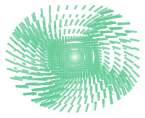

In [106]:
fg_mls

In [107]:
init_pts = np.array(bg_pts)
lss = []
for pt in init_pts:
    new_pts = evaluate(saddle, pt.copy(), 2, dt=1)
    ls = LineString(new_pts).difference(boxes).intersection(workspace)
    if ls.length > 0:
        lss.append(ls)
bg_mls = gp.merge_LineStrings(lss)


/home/naka/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [108]:
circle = Point(0, -20).buffer(30)
subtracted = bg_mls.difference(circle)

In [109]:
merged_mls = gp.merge_LineStrings([fg_mls, subtracted])

In [110]:
final = gp.make_like(merged_mls, drawbox)

In [111]:
sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')

sk.geometry(final)

# sk.stroke(len(layers)+2)
# sk.geometry(blss)
    
sk.display(color_mode='layer')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vsketch/vsketch.py:1021: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for ls in shape:


<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-11-19T11:45:36.914797

In [ ]:
sk.vpype('splitall linemerge -t 0.1 linesimplify linemerge -t 0.3 linesimplify linemerge -t 0.5 linesimplify linesort')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:150: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in lines:
/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vpype/model.py:151: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.append(line)


In [ ]:
plot_id = fn.new_plot_id()
savedir='/home/naka/art/plotter_svgs'

saved 20221114-161021_856659-43f19-f78bbe to s3://algorithmic-ink/current_plot_id


In [ ]:
savepath = Path(savedir).joinpath(f'{plot_id}.svg').as_posix()
sk.save(savepath)